# Team assignment - Boston

## 1 Data collection and preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Bike rentals

Read data on bike rentals:

In [3]:
bike = pd.read_csv("boston_2016.csv")

In [9]:
#for later use
#bike15 = pd.read_csv("boston_2015.csv")
#bike17 = pd.read_csv("boston_2017.csv")
#bike18 = pd.read_csv("boston_2018.csv")
#bike19 = pd.read_csv("boston_2019.csv")

In [10]:
bike.columns

Index(['start_time', 'end_time', 'start_station_id', 'end_station_id',
       'start_station_name', 'end_station_name', 'bike_id', 'user_type'],
      dtype='object')

In [11]:
bike.head(5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2016-01-01 00:08:07,2016-01-01 00:40:26,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1406,Subscriber
1,2016-01-01 00:08:19,2016-01-01 00:40:27,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1121,Subscriber
2,2016-01-01 00:10:15,2016-01-01 00:40:29,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,474,Subscriber
3,2016-01-01 00:10:22,2016-01-01 00:40:11,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1504,Subscriber
4,2016-01-01 00:15:36,2016-01-01 00:31:17,36,67,Boston Public Library - 700 Boylston St.,MIT at Mass Ave / Amherst St,913,Customer


In [12]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236203 entries, 0 to 1236202
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   start_time          1236203 non-null  object
 1   end_time            1236203 non-null  object
 2   start_station_id    1236203 non-null  int64 
 3   end_station_id      1236203 non-null  int64 
 4   start_station_name  1236203 non-null  object
 5   end_station_name    1236203 non-null  object
 6   bike_id             1236203 non-null  int64 
 7   user_type           1236203 non-null  object
dtypes: int64(3), object(5)
memory usage: 75.5+ MB


Number of entries (1236203) = Non-Null count for all colums, meaning we are not missing any values.

**Cleaning the datset:**

In [4]:
bike.isnull()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1236198,False,False,False,False,False,False,False,False
1236199,False,False,False,False,False,False,False,False
1236200,False,False,False,False,False,False,False,False
1236201,False,False,False,False,False,False,False,False


In [5]:
#transforming Dtype of start_time/end_time from object to datetime
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236203 entries, 0 to 1236202
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   start_time          1236203 non-null  datetime64[ns]
 1   end_time            1236203 non-null  datetime64[ns]
 2   start_station_id    1236203 non-null  int64         
 3   end_station_id      1236203 non-null  int64         
 4   start_station_name  1236203 non-null  object        
 5   end_station_name    1236203 non-null  object        
 6   bike_id             1236203 non-null  int64         
 7   user_type           1236203 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 75.5+ MB


In [6]:
# Creates column that provides the duration of the rental period
bike['trip_duration'] = bike['end_time']-bike['start_time']
bike.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,trip_duration
0,2016-01-01 00:08:07,2016-01-01 00:40:26,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1406,Subscriber,0 days 00:32:19
1,2016-01-01 00:08:19,2016-01-01 00:40:27,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1121,Subscriber,0 days 00:32:08
2,2016-01-01 00:10:15,2016-01-01 00:40:29,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,474,Subscriber,0 days 00:30:14
3,2016-01-01 00:10:22,2016-01-01 00:40:11,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1504,Subscriber,0 days 00:29:49
4,2016-01-01 00:15:36,2016-01-01 00:31:17,36,67,Boston Public Library - 700 Boylston St.,MIT at Mass Ave / Amherst St,913,Customer,0 days 00:15:41


**Elimination**

In [7]:
# Dropping entries with negative trip duration
bike = bike[bike['trip_duration'] >= pd.Timedelta(0)]
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236200 entries, 0 to 1236202
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   start_time          1236200 non-null  datetime64[ns] 
 1   end_time            1236200 non-null  datetime64[ns] 
 2   start_station_id    1236200 non-null  int64          
 3   end_station_id      1236200 non-null  int64          
 4   start_station_name  1236200 non-null  object         
 5   end_station_name    1236200 non-null  object         
 6   bike_id             1236200 non-null  int64          
 7   user_type           1236200 non-null  object         
 8   trip_duration       1236200 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(3), object(3), timedelta64[ns](1)
memory usage: 94.3+ MB


In [8]:
bike["weekday"] = bike["start_time"].dt.dayofweek
bike.head(60000)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,trip_duration,weekday
0,2016-01-01 00:08:07,2016-01-01 00:40:26,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1406,Subscriber,0 days 00:32:19,4
1,2016-01-01 00:08:19,2016-01-01 00:40:27,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1121,Subscriber,0 days 00:32:08,4
2,2016-01-01 00:10:15,2016-01-01 00:40:29,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,474,Subscriber,0 days 00:30:14,4
3,2016-01-01 00:10:22,2016-01-01 00:40:11,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1504,Subscriber,0 days 00:29:49,4
4,2016-01-01 00:15:36,2016-01-01 00:31:17,36,67,Boston Public Library - 700 Boylston St.,MIT at Mass Ave / Amherst St,913,Customer,0 days 00:15:41,4
...,...,...,...,...,...,...,...,...,...,...
59995,2016-03-28 16:30:21,2016-03-28 16:32:40,91,80,One Kendall Square at Hampshire St / Portland St,MIT Stata Center at Vassar St / Main St,769,Customer,0 days 00:02:19,0
59996,2016-03-28 16:31:49,2016-03-28 16:36:49,108,115,Harvard University / SEAS Cruft-Pierce Halls a...,Porter Square Station,1109,Subscriber,0 days 00:05:00,0
59997,2016-03-28 16:32:14,2016-03-28 16:40:06,189,88,Kendall T,Inman Square at Vellucci Plaza / Hampshire St,1051,Subscriber,0 days 00:07:52,0
59998,2016-03-28 16:32:28,2016-03-28 16:42:43,22,38,South Station - 700 Atlantic Ave.,TD Garden - Causeway at Portal Park #2,1081,Subscriber,0 days 00:10:15,0


### Weather

Read weather data:

In [8]:
weatherhour = pd.read_csv("weather_hourly_boston.csv")

In [19]:
weatherhour.columns

Index(['date_time', 'max_temp', 'min_temp', 'precip'], dtype='object')

In [20]:
weatherhour.head(3)

,date_time,max_temp,min_temp,precip
0,2015-01-02 01:00:00,-1.1,-1.1,0.0
1,2015-01-02 02:00:00,-1.1,-1.1,0.0
2,2015-01-02 03:00:00,-0.6,-0.6,0.0


In [21]:
weatherhour.describe()

,max_temp,min_temp,precip
count,43354.000000,43354.000000,43356.000000
mean,11.456717,11.395922,0.095581
std,10.118606,10.114095,0.294019
min,-22.800000,-22.800000,0.000000
25%,3.300000,3.300000,0.000000
50%,11.700000,11.700000,0.000000
75%,20.000000,19.850000,0.000000
max,36.100000,36.100000,1.000000


In [22]:
weatherhour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43354 non-null  object 
 1   max_temp   43354 non-null  float64
 2   min_temp   43354 non-null  float64
 3   precip     43356 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


Number of entries (43848) != Non-Null count for all colums, meaning we are (!) missing values.

In [9]:
#transforming Dtype of date_time from object to datetime
weatherhour['date_time'] = pd.to_datetime(weatherhour['date_time'])
weatherhour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  43354 non-null  datetime64[ns]
 1   max_temp   43354 non-null  float64       
 2   min_temp   43354 non-null  float64       
 3   precip     43356 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.3 MB


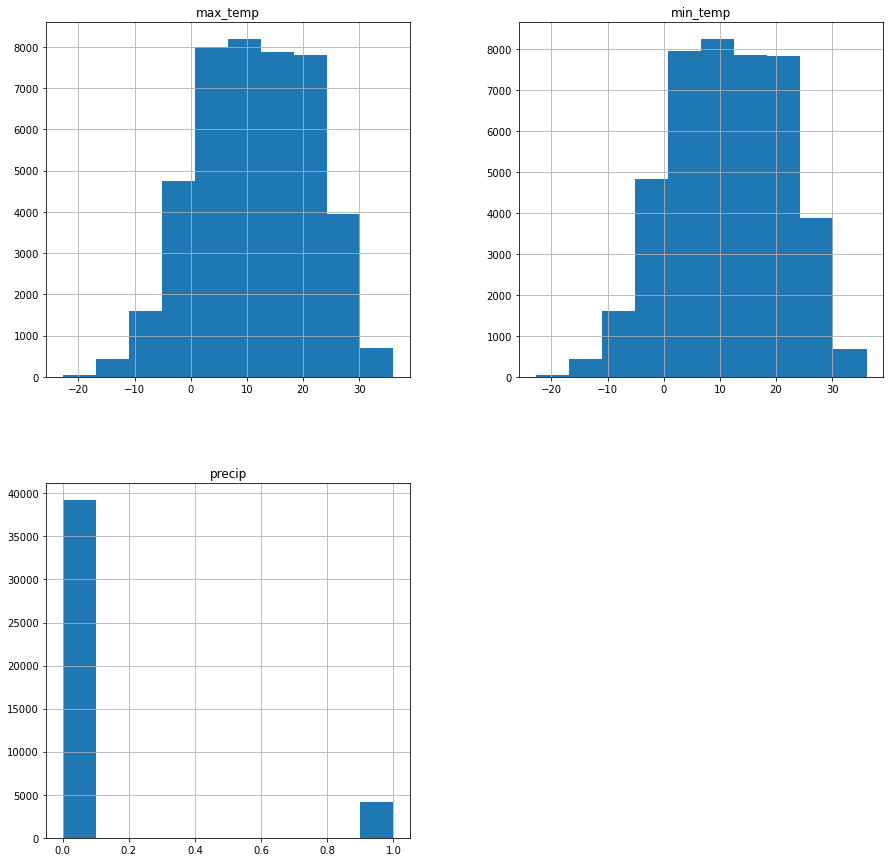

In [24]:
# Histogram of all numeric fields
weatherhour_hist = weatherhour.drop(columns=['date_time'],axis=1)
weatherhour_hist.hist(figsize=(15,15));

**Cleaning the datset:**

In [25]:
weatherhour.isnull()

,date_time,max_temp,min_temp,precip
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
43843,False,False,False,False
43844,False,False,False,False
43845,False,False,False,False
43846,False,False,False,False


In [10]:
#display entries with NaN values
NaN_for_attribute = weatherhour[weatherhour["date_time"].isna()] #insert any attribute
NaN_for_attribute

,date_time,max_temp,min_temp,precip
98,NaT,NaN,NaN,NaN
145,NaT,NaN,NaN,NaN
304,NaT,NaN,NaN,NaN
395,NaT,NaN,NaN,NaN
588,NaT,NaN,NaN,NaN
...,...,...,...,...
43019,NaT,NaN,NaN,NaN
43428,NaT,NaN,NaN,NaN
43570,NaT,NaN,NaN,NaN
43594,NaT,NaN,NaN,NaN


Mostly, for given entries values are missing for all attributes.

**Elimination**

In [11]:
# Dropping rows with missing values.
weatherhour.dropna(axis=0, inplace=True)
NaN_for_attribute = weatherhour[weatherhour["date_time"].isna()] #insert any attribute
NaN_for_attribute

,date_time,max_temp,min_temp,precip


In [28]:
weatherhour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43354 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  43354 non-null  datetime64[ns]
 1   max_temp   43354 non-null  float64       
 2   min_temp   43354 non-null  float64       
 3   precip     43354 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.7 MB


In [12]:
# Dropping duplicates (date_time)
# Only date_time is faulty, dropping duplicates leads to less data! 
# We should fix this by just manipulating the entries in the date_time column.
weatherhour.drop_duplicates(subset='date_time', keep='first', inplace=True, ignore_index=False)
weatherhour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40889 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  40889 non-null  datetime64[ns]
 1   max_temp   40889 non-null  float64       
 2   min_temp   40889 non-null  float64       
 3   precip     40889 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.6 MB


**Imputation** <br>
To maintain the completeness of the time series dataset, we have decided to impute missing values.

In [13]:
# Extending the dataframe with missing time stamps
# Set the index to the datetime column
weatherhour.index = pd.to_datetime(weatherhour['date_time'])

# Generate a sequence of hourly dates between the start and end dates of the data
dates = pd.date_range(start=weatherhour.index.min(), end=weatherhour.index.max(), freq='H')

# Reindex the dataframe with the new dates
weatherhour = weatherhour.reindex(dates)

weatherhour.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43848 entries, 2015-01-01 06:00:00 to 2020-01-02 05:00:00
Freq: H
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  40889 non-null  datetime64[ns]
 1   max_temp   40889 non-null  float64       
 2   min_temp   40889 non-null  float64       
 3   precip     40889 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.7 MB


In [31]:
weatherhour.head()

,date_time,max_temp,min_temp,precip
2015-01-01 06:00:00,2015-01-01 06:00:00,-5.6,-5.6,0.0
2015-01-01 07:00:00,2015-01-01 07:00:00,-5.6,-5.6,0.0
2015-01-01 08:00:00,2015-01-01 08:00:00,-5.6,-5.6,0.0
2015-01-01 09:00:00,2015-01-01 09:00:00,-4.4,-4.4,0.0
2015-01-01 10:00:00,2015-01-01 10:00:00,-5.6,-5.6,0.0


In [14]:
# Deletes date_time column as it is now our index
weatherhour.drop('date_time', axis=1, inplace=True)

In [33]:
weatherhour.head()

,max_temp,min_temp,precip
2015-01-01 06:00:00,-5.6,-5.6,0.0
2015-01-01 07:00:00,-5.6,-5.6,0.0
2015-01-01 08:00:00,-5.6,-5.6,0.0
2015-01-01 09:00:00,-4.4,-4.4,0.0
2015-01-01 10:00:00,-5.6,-5.6,0.0


In [15]:
# Imputing missing values by means of interpolation
weatherhour['interp_maxtemp']  = weatherhour['max_temp'].interpolate()   # mean of prev/next
weatherhour['interp_mintemp']  = weatherhour['min_temp'].interpolate()   # mean of prev/next
weatherhour['interp_precip']  = weatherhour['precip'].interpolate()   # mean of prev/next
weatherhour['update_maxtemp'] = weatherhour['interp_maxtemp']
weatherhour['update_maxtemp'].update( weatherhour['max_temp'] )  # note: this is an inplace operation
weatherhour['update_mintemp'] = weatherhour['interp_mintemp']
weatherhour['update_mintemp'].update( weatherhour['min_temp'] )  # note: this is an inplace operation
weatherhour['update_precip'] = weatherhour['interp_precip']
weatherhour['update_precip'].update( weatherhour['precip'] )  # note: this is an inplace operation
weatherhour.head(98)

,max_temp,min_temp,precip,interp_maxtemp,interp_mintemp,interp_precip,update_maxtemp,update_mintemp,update_precip
2015-01-01 06:00:00,-5.6,-5.6,0.0,-5.60,-5.60,0.0,-5.60,-5.60,0.0
2015-01-01 07:00:00,-5.6,-5.6,0.0,-5.60,-5.60,0.0,-5.60,-5.60,0.0
2015-01-01 08:00:00,-5.6,-5.6,0.0,-5.60,-5.60,0.0,-5.60,-5.60,0.0
2015-01-01 09:00:00,-4.4,-4.4,0.0,-4.40,-4.40,0.0,-4.40,-4.40,0.0
2015-01-01 10:00:00,-5.6,-5.6,0.0,-5.60,-5.60,0.0,-5.60,-5.60,0.0
...,...,...,...,...,...,...,...,...,...
2015-01-05 03:00:00,NaN,NaN,NaN,10.85,10.60,1.0,10.85,10.60,1.0
2015-01-05 04:00:00,10.6,10.6,1.0,10.60,10.60,1.0,10.60,10.60,1.0
2015-01-05 05:00:00,10.0,10.0,0.0,10.00,10.00,0.0,10.00,10.00,0.0
2015-01-05 06:00:00,NaN,NaN,NaN,8.35,8.35,0.0,8.35,8.35,0.0


### Stations

In [16]:
stations = pd.read_csv("current_bluebikes_stations.csv")
stations.head()

,Number,Name,Latitude,Longitude,District,Public,Total docks,Deployment Year
0,K32015,1200 Beacon St,42.344149,-71.114674,Brookline,Yes,15,2021.0
1,W32006,160 Arsenal,42.364664,-71.175694,Watertown,Yes,11,2021.0
2,A32019,175 N Harvard St,42.363796,-71.129164,Boston,Yes,17,2014.0
3,S32035,191 Beacon St,42.380323,-71.108786,Somerville,Yes,19,2018.0
4,C32094,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003,Boston,Yes,17,2020.0


In [36]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Number           448 non-null    object 
 1   Name             448 non-null    object 
 2   Latitude         448 non-null    float64
 3   Longitude        448 non-null    float64
 4   District         444 non-null    object 
 5   Public           448 non-null    object 
 6   Total docks      448 non-null    int64  
 7   Deployment Year  443 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 28.1+ KB


In [17]:
NaN_for_attribute2 = stations[stations["Deployment Year"].isna()]
NaN_for_attribute2

,Number,Name,Latitude,Longitude,District,Public,Total docks,Deployment Year
7,S32049,515 Somerville Ave (Temp. Winter Location),42.383227,-71.106069,NaN,Yes,19,NaN
65,D32056,Boylston St at Charles St,42.352576,-71.067644,Boston,Yes,31,NaN
83,S32044,Broadway Opposite Norwood Ave (Temp Winter St...,42.396764,-71.102376,Somerville,Yes,15,NaN
236,M32083,John Ahern Field at Kennedy-Longfellow School,42.369036,-71.086310,NaN,Yes,19,NaN
401,S32042,Trum Field @ Cedar St (Temp Winter Station),42.398444,-71.107833,Somerville,Yes,19,NaN


## 2 Descriptive Analytics

### KPIs - Fleet operation

**Total number of rentals per day:**

In [10]:
#listed daily started rentals
bike.groupby([pd.Grouper(key='start_time',freq='D')]).size().reset_index(name='rentals_count')

,start_time,rentals_count
0,2016-01-01,242
1,2016-01-02,221
2,2016-01-03,245
3,2016-01-04,277
4,2016-01-05,325
...,...,...
361,2016-12-27,1303
362,2016-12-28,1145
363,2016-12-29,601
364,2016-12-30,775


In [13]:
#additional information of daily rental distribution
bike.groupby([pd.Grouper(key='start_time',freq='D')]).size().reset_index(name='rentals_count').describe()

,rentals_count
count,366.000000
mean,3377.595628
std,2178.181991
min,95.000000
25%,1138.250000
50%,3642.500000
75%,5447.250000
max,6949.000000


Text(0, 0.5, 'Total number of rentals')

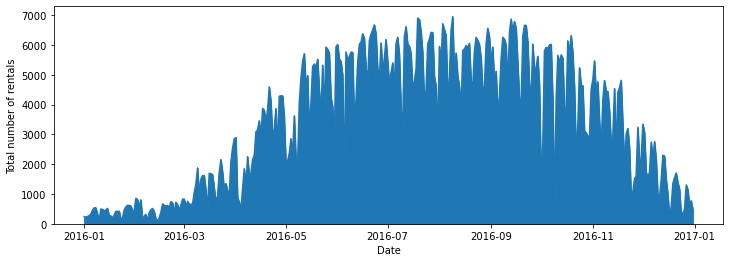

In [18]:
bikeplot = bike.groupby(bike["start_time"].rename('Date').dt.date).size()

fig, axs = plt.subplots(figsize=(12, 4))
bikeplot.plot.area(ax=axs)
axs.set_ylabel('Total number of rentals')

**Total number of rentals per hour:**

In [9]:
#listed hourly started rentals
bike.groupby([pd.Grouper(key='start_time',freq='H')]).size().reset_index(name='rentals_count')

,start_time,rentals_count
0,2016-01-01 00:00:00,13
1,2016-01-01 01:00:00,14
2,2016-01-01 02:00:00,9
3,2016-01-01 03:00:00,1
4,2016-01-01 04:00:00,0
...,...,...
8779,2016-12-31 19:00:00,20
8780,2016-12-31 20:00:00,13
8781,2016-12-31 21:00:00,22
8782,2016-12-31 22:00:00,6


In [12]:
#additional information of hourly rental distribution
bike.groupby([pd.Grouper(key='start_time',freq='H')]).size().reset_index(name='rentals_count').describe()

,rentals_count
count,8784.000000
mean,140.733151
std,167.130396
min,0.000000
25%,15.000000
50%,66.000000
75%,224.000000
max,920.000000


Text(0, 0.5, 'Total number of rentals')

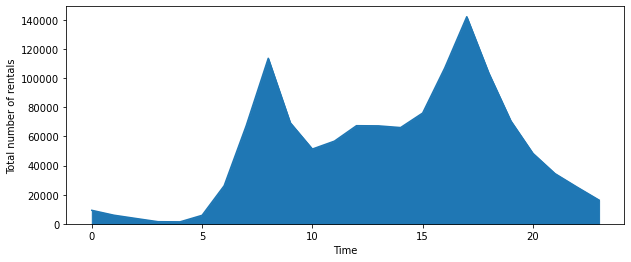

In [19]:
bikeplot2 = bike.groupby(bike["start_time"].rename('Time').dt.hour).size()

fig, axs = plt.subplots(figsize=(10,4))
bikeplot2.plot.area(ax=axs)
axs.set_ylabel('Total number of rentals')

**Total number of rentals per month:**

Text(0, 0.5, 'Total number of rentals')

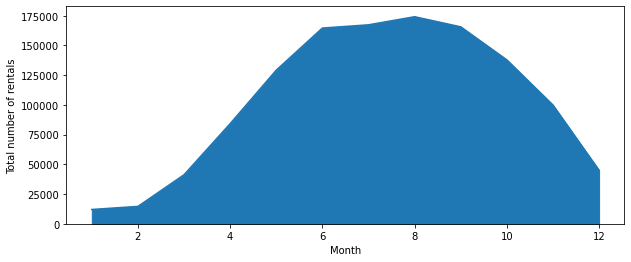

In [20]:
bikeplot2 = bike.groupby(bike["start_time"].rename('Month').dt.month).size()

fig, axs = plt.subplots(figsize=(10,4))
bikeplot2.plot.area(ax=axs)
axs.set_ylabel('Total number of rentals')

**Average usage time...**

sum of trip duration for each hour

In [15]:
#same possible with "end_time" but values till mid 2017 then 
bike.groupby([pd.Grouper(key='start_time',freq='H')]).trip_duration.sum().reset_index(name='sum_trip_duration')

,start_time,sum_trip_duration
0,2016-01-01 00:00:00,0 days 03:11:48
1,2016-01-01 01:00:00,0 days 08:34:10
2,2016-01-01 02:00:00,1 days 22:14:40
3,2016-01-01 03:00:00,0 days 00:09:01
4,2016-01-01 04:00:00,0 days 00:00:00
...,...,...
8779,2016-12-31 19:00:00,0 days 03:24:29.498000
8780,2016-12-31 20:00:00,0 days 02:43:46.803000
8781,2016-12-31 21:00:00,0 days 03:08:43.178000
8782,2016-12-31 22:00:00,0 days 00:27:10.108000


mean trip duration for each hour

In [16]:
bike.groupby([pd.Grouper(key='start_time',freq='H')]).trip_duration.mean().reset_index(name='mean_trip_duration')

,start_time,mean_trip_duration
0,2016-01-01 00:00:00,0 days 00:14:45.230769230
1,2016-01-01 01:00:00,0 days 00:36:43.571428571
2,2016-01-01 02:00:00,0 days 05:08:17.777777777
3,2016-01-01 03:00:00,0 days 00:09:01
4,2016-01-01 04:00:00,NaT
...,...,...
8779,2016-12-31 19:00:00,0 days 00:10:13.474900
8780,2016-12-31 20:00:00,0 days 00:12:35.907923076
8781,2016-12-31 21:00:00,0 days 00:08:34.689909090
8782,2016-12-31 22:00:00,0 days 00:04:31.684666666


mean trip duration per day

In [18]:
bike.groupby([pd.Grouper(key='start_time',freq='D')]).trip_duration.mean().reset_index(name='mean_trip_duration')

,start_time,mean_trip_duration
0,2016-01-01,0 days 00:45:46.466942148
1,2016-01-02,0 days 00:18:57.846153846
2,2016-01-03,0 days 00:11:16.693877551
3,2016-01-04,0 days 00:27:31.729241877
4,2016-01-05,0 days 00:11:45.135384615
...,...,...
361,2016-12-27,0 days 00:16:45.200475825
362,2016-12-28,0 days 03:44:50.150485589
363,2016-12-29,0 days 00:13:39.436765391
364,2016-12-30,0 days 00:11:46.111672258


mean trip duration per months

In [19]:
bike.groupby([pd.Grouper(key='start_time',freq='M')]).trip_duration.mean().reset_index(name='mean_trip_duration')

,start_time,mean_trip_duration
0,2016-01-31,0 days 00:31:32.540273745
1,2016-02-29,0 days 00:23:14.261080379
2,2016-03-31,0 days 00:35:01.990478959
3,2016-04-30,0 days 00:24:37.853896180
4,2016-05-31,0 days 00:25:44.551818041
5,2016-06-30,0 days 00:21:07.629597915
6,2016-07-31,0 days 00:23:41.903402335
7,2016-08-31,0 days 00:21:50.239273700
8,2016-09-30,0 days 00:19:52.387561108
9,2016-10-31,0 days 00:18:34.887498639


In [21]:
# Merging bike and staion datasets
stations.rename(columns={'Name': 'start_station_name'}, inplace=True)
bike_station = pd.merge(bike, stations, on='start_station_name')

**... based on time of day:**

In [22]:
bike_station.groupby(bike_station['start_time'].dt.hour)['trip_duration'].mean()

start_time
0    0 days 01:12:32.202344553
1    0 days 00:34:32.346409629
2    0 days 00:35:31.946386825
3    0 days 00:37:22.236057632
4    0 days 00:16:01.044994690
5    0 days 00:35:23.200573383
6    0 days 00:14:30.653241931
7    0 days 00:38:01.747030717
8    0 days 00:23:01.065738101
9    0 days 00:14:23.730516525
10   0 days 00:17:02.541590853
11   0 days 00:17:33.158350320
12   0 days 00:18:15.411411392
13   0 days 00:19:08.947904359
14   0 days 00:26:57.239758787
15   0 days 00:20:14.872788384
16   0 days 00:18:04.426416404
17   0 days 00:19:39.608886130
18   0 days 00:16:57.156870885
19   0 days 00:16:46.761157863
20   0 days 00:16:10.496637211
21   0 days 00:16:17.068401750
22   0 days 00:32:28.377506650
23   0 days 00:16:05.670735659
Name: trip_duration, dtype: timedelta64[ns]

In [28]:
# To think about: Treating outliers - Longest usage time is over a year...
max_index = bike_station['trip_duration'].idxmax()

# Get the row with the highest value
max_row = bike_station.loc[max_index]
max_row

start_time                             2016-12-25 07:30:38.539000
end_time                               2017-12-06 10:45:17.962000
start_station_id                                               36
end_station_id                                                 26
start_station_name    Copley Square - Dartmouth St at Boylston St
end_station_name                      Washington St at Waltham St
bike_id                                                      1053
user_type                                                Customer
trip_duration                            346 days 03:14:39.423000
weekday                                                         6
Number                                                     D32005
Latitude                                                42.349928
Longitude                                              -71.077392
District                                                   Boston
Public                                                        Yes
Total dock

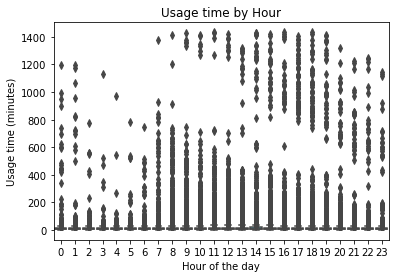

In [36]:
bs_hour = bike_station
# Extract hour from the timestamp and store it in a new column
bs_hour['hour'] = bs_hour['start_time'].dt.hour

# Convert the timedelta values to minutes if they are less than 1 day
# This excludes entries with trip duration > 1 day
threshold = np.timedelta64(1, 'D')
bs_hour['td_min'] = np.where(bs_hour['trip_duration'] < threshold,
bs_hour['trip_duration'].dt.total_seconds() / 60, np.nan)

# Plotting
sns.boxplot(x='hour', y='td_min', data=bs_hour)
plt.title('Usage time by Hour')
plt.xlabel('Hour of the day')
plt.ylabel('Usage time (minutes)')
plt.show()

... based on user type:

In [179]:
bike_station.groupby('user_type')['trip_duration'].mean()

user_type
Customer     0 days 00:45:47.386605299
Subscriber   0 days 00:15:20.670072523
Name: trip_duration, dtype: timedelta64[ns]

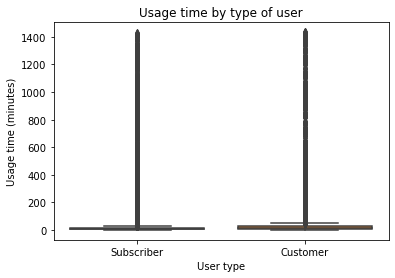

In [37]:
# Plotting
sns.boxplot(x='user_type', y='td_min', data=bs_hour)
plt.title('Usage time by type of user')
plt.xlabel('User type')
plt.ylabel('Usage time (minutes)')
plt.show()

... based on start station:

In [180]:
bike_station.groupby('start_station_name')['trip_duration'].mean()

start_station_name
175 N Harvard St                                                     0 days 00:13:45.545705882
359 Broadway - Broadway at Fayette Street                            0 days 00:13:14.150516833
Airport T Stop - Bremen St at Brooks St                              0 days 00:42:07.144251497
Alewife MBTA at Steel Place                                          0 days 01:00:07.549475490
Alewife Station at Russell Field                                     0 days 00:24:21.391205087
                                                                                ...           
Washington St at Melnea Cass Blvd                                    0 days 00:24:08.934658718
Washington St at Rutland St                                          0 days 00:15:56.574751968
Watermark Seaport - Boston Wharf Rd at Seaport Blvd                  0 days 00:10:56.292378306
Wentworth Institute of Technology - Huntington Ave at Vancouver St   0 days 00:27:21.983835294
Wilson Square                  

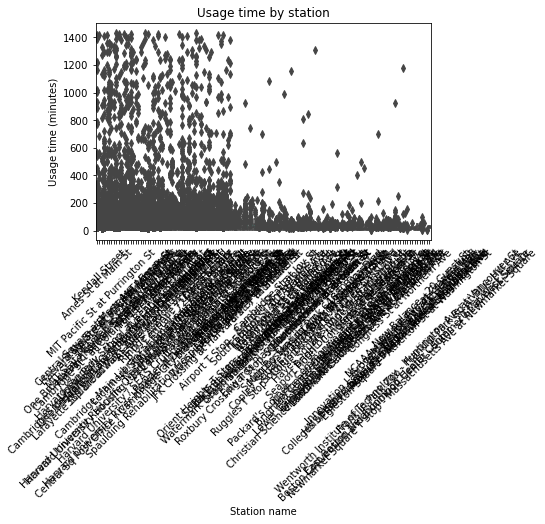

In [39]:
# Plotting
sns.boxplot(x='start_station_name', y='td_min', data=bs_hour)
plt.title('Usage time by station')
plt.xlabel('Station name')
plt.ylabel('Usage time (minutes)')
plt.setp(plt.gca().get_xticklabels(), rotation=45)
plt.show()

... based on district:

In [181]:
bike_station.groupby('District')['trip_duration'].mean()

District
Boston       0 days 00:34:13.902650443
Brookline    0 days 00:19:45.846572803
Cambridge    0 days 00:17:54.593318700
Somerville   0 days 00:19:29.447287029
Name: trip_duration, dtype: timedelta64[ns]

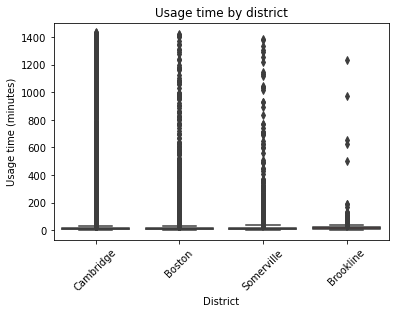

In [40]:
# Plotting
sns.boxplot(x='District', y='td_min', data=bs_hour)
plt.title('Usage time by district')
plt.xlabel('District')
plt.ylabel('Usage time (minutes)')
plt.setp(plt.gca().get_xticklabels(), rotation=45)
plt.show()

Total duration of usage time per bike:

In [46]:
time_in_use = bike_station.groupby('bike_id')['trip_duration'].sum().reset_index()
time_in_use.sort_values('trip_duration', ascending=False)

,bike_id,trip_duration
990,1053,349 days 06:25:10.621000
360,390,169 days 21:38:34.975000
1051,1116,128 days 08:48:44.094000
53,56,92 days 21:10:45.448000
1,2,90 days 18:45:03.191000
...,...,...
522,563,0 days 00:14:46
1232,1301,0 days 00:11:21.454000
1584,1716,0 days 00:11:10.696000
1764,1897,0 days 00:05:11


Fleet usage:

In [47]:
# Total number of added docks per year
total_fleet_size = stations.groupby('Deployment Year')['Total docks'].sum()
total_fleet_size

Deployment Year
2011.0     849
2012.0     770
2013.0     258
2014.0     241
2015.0     330
2016.0     470
2017.0     175
2018.0    1079
2019.0     891
2020.0     541
2021.0     693
2022.0     410
Name: Total docks, dtype: int64

In [48]:
# Total fleet size in 2016 (assuming there was no loss of formerly built docks and all the docks added in 2016
# were added at the beginning of the year)
fs_2016 = sum(total_fleet_size[0:2016])
print('Total fleet size in 2016:')
fs_2016

Total fleet size in 2016:


2918


## Temporal Demand Patterns and Seasonality

In the following, we want to demonstrate how fleet usage varies with regard to different temporal constellations.

### Fleet Usage Variation During a Day

Here we calculate the average amount of bookings (counted with start_time) per hour of a day to show how fleet usage changes during a day. We can observe, that there is higher demand for bikes during daytime than at night. Moreover we can see peaks of usage within the so-called 'rush hours': demand for bikes is the highest at 8 am, when people have to get to work, and at 5 pm, when people want to go back to their homes after work.


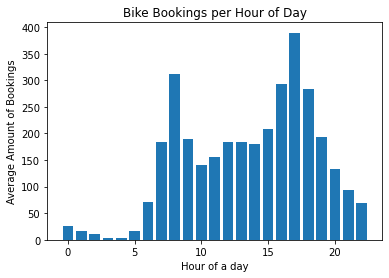

In [49]:
#Count bookings per start_time for each hour of a day (0-23)
#Devide by 365 to get a daily average
hour_of_a_day = []
for i in range(0,23):
    hour_of_a_day.append([i, bike['start_time'].loc[(bike['start_time'].dt.hour) == i].count()/365])
hour_of_a_day = pd.DataFrame(hour_of_a_day)

# Plotting
plt.bar(hour_of_a_day[0], hour_of_a_day[1])
plt.title('Bike Bookings per Hour of Day')
plt.xlabel('Hour of a day')
plt.ylabel('Average Amount of Bookings')
plt.show()


### Fleet Usage Variation During a Week

Here we calculate the average amount of bookings (counted with start_time) per day of a week (Monday to Sunday) to show how fleet usage changes during a week. We can observe, that there is higher demand for bikes during the week than on weekends. This aligns quite well wtih the findings of the daily variation of fleet usage - bike demand seems to be heavily driven by work.


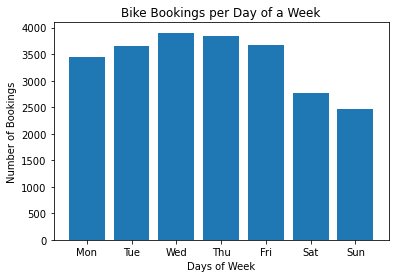

In [50]:
#Count bookings per start_time for each day of a week
#Devide by 52 to get an average value for a week
bike_day_of_a_week = []
for i in range(0,7):
    bike_day_of_a_week.append([i,bike['start_time'].loc[(bike['start_time'].dt.dayofweek) == i].count()/52])
bike_day_of_a_week = pd.DataFrame(bike_day_of_a_week)

#Plotting
days_of_a_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.bar(days_of_a_week,bike_day_of_a_week[1])
plt.title('Bike Bookings per Day of a Week')
plt.xlabel('Days of Week')
plt.ylabel('Number of Bookings')
plt.show()


### Fleet Usage Variation During a Year

Here we calculate the total amount of bookings (counted with start_time) on a monthly basis to show how fleet usage changes during a year. We can observe, that there is significantly higher demand for bikes in summer months than during winter. This seems all too understandable, as the weather and temperatures in summer tend to invite cycling


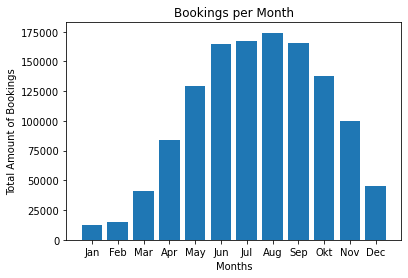

In [51]:
#Count the number of bookings on a monthly basis
bike.index = bike.start_time
bike_month = pd.Series(bike['start_time'].resample('1M').count())

#Plotting
months =['Jan', 'Feb', 'Mar', 'Apr', 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Okt' , 'Nov' , 'Dec']
plt.bar(months,bike_month)
plt.title('Bookings per Month')
plt.xlabel('Months')
plt.ylabel('Total Amount of Bookings')
plt.show()

**Locations of all bike stations**

To display the interactive map, you´ll need the folium package. Just type this into the anaconda prompt:<b>
conda install -c conda-forge folium

In [186]:
import folium
#Sets the center of the map
loc_center = [stations['Latitude'].mean(), stations['Longitude'].mean()] #Sets the center of the map

#Creates map
map1 = folium.Map(location = loc_center, tiles='Openstreetmap', zoom_start = 10, control_scale=True)

#Creates Markers for the bike stations
for index, loc in stations.iterrows():
    folium.CircleMarker([loc['Latitude'], loc['Longitude']],radius=2, weight=5, popup=loc['start_station_name']).add_to(map1)
    
folium.LayerControl().add_to(map1)

map1